In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn import tree, svm, datasets, metrics
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from utilities import plot_2d_data, plot_2d_classifier, plot_confusionmatrix
from utilities import learning_curve_model, validation_curve_model, plot_learning_curve
from scipy import stats
import seaborn as sns
import os
import timeit

from utilities import get_colors
cm = get_colors(colormap='RdBu', n_colors=2)

In [2]:
data = pd.read_csv("./data/abalone.csv")
data.shape

(4177, 9)

In [3]:
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data = data.apply(LabelEncoder().fit_transform)
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6


In [5]:
data['Volume'] = data['Length']*data['Diameter']*data['Height']
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Volume
0,2,66,56,18,715,417,199,263,14,66528
1,2,45,36,17,285,178,94,113,6,27540
2,0,81,67,26,962,480,280,374,8,141102
3,2,63,56,24,718,400,225,273,9,84672
4,1,41,34,15,253,159,76,87,6,20910


In [17]:
data_X = data.drop(columns = ['Rings', 'Sex', 'Length', 'Diameter', 'Height'], axis=1)/256
data_y = data['Rings']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=100)
train_X.shape

(3341, 5)

In [7]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [8]:
dtc = tree.DecisionTreeClassifier(random_state=100)
dtc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=100)

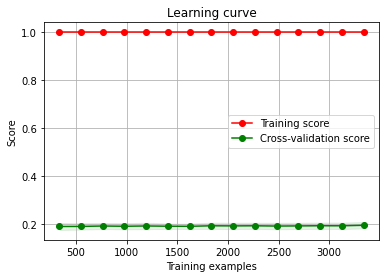

In [9]:
train_size=np.linspace(.1, 1.0, 15)
learning_curve_model(data_X, data_y, dtc, cv, train_size)
plt.show()

In [10]:
predict_y_train = dtc.predict(train_X)
predict_y = dtc.predict(test_X)
print(f"Training accuracy score: {100* accuracy_score(train_y, predict_y_train)}%")
print(f"Testing accuracy Score: {100* accuracy_score(test_y, predict_y)}%")

Training accuracy score: 100.0%
Testing accuracy Score: 19.85645933014354%


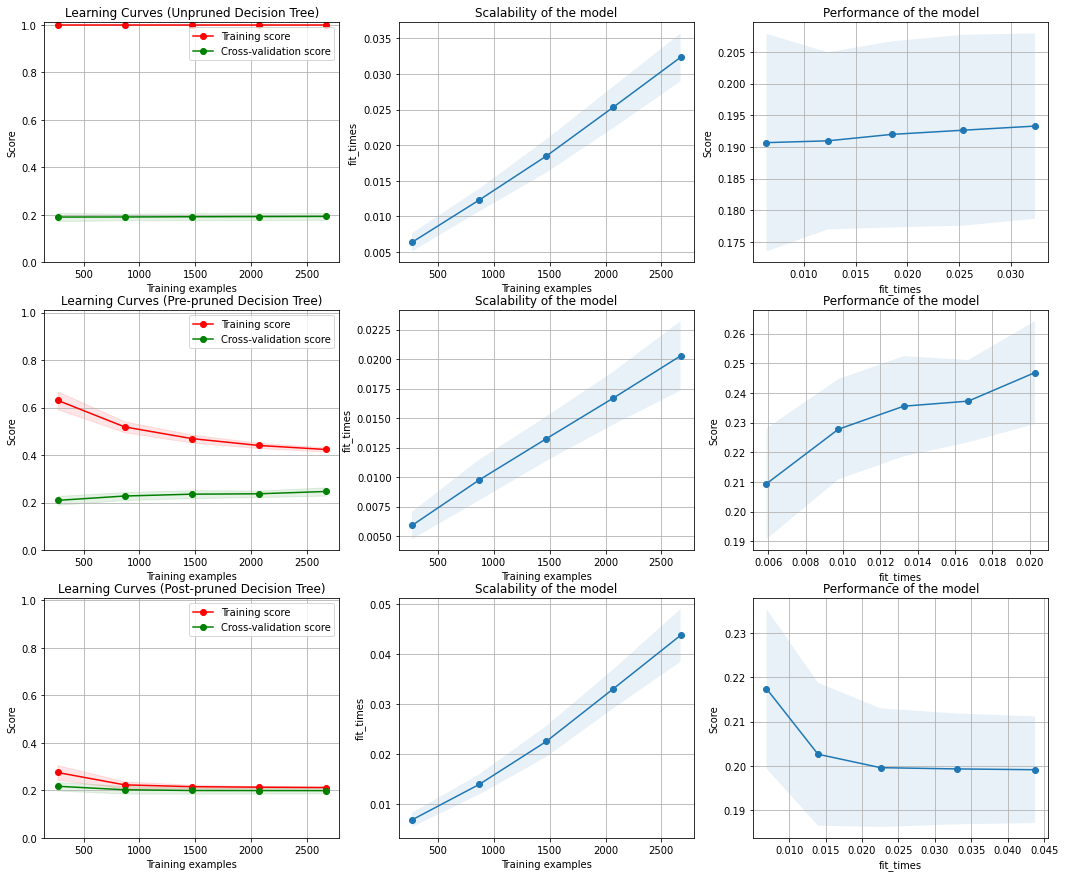

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
plot_learning_curve(dtc, title, train_X, train_y, axes=axes[0, :], ylim=(0.0, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=100)
plot_learning_curve(dtc_pre, title, train_X, train_y, axes=axes[1,:], ylim=(0.0, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
plot_learning_curve(dtc_post, title, train_X, train_y, axes=axes[2,:], ylim=(0.0, 1.01), cv=cv, n_jobs=4)


plt.show()

### Neural Network

<ipython-input-24-fad0936c5c58>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(clf1.loss_curve_)


ValueError: Single argument to subplot must be a three-digit integer, not [5.1917523156309215, 3.264051883791522, 3.2529870053311414, 3.2416772419478765, 3.230468756300413, 3.2194424937078336, 3.208569181096008, 3.1977617215377916, 3.187193945622196, 3.176728283496833, 3.1663622125653728, 3.156217629692006, 3.1461952284826538, 3.136245369804361, 3.1264688826755616, 3.1169232246638825, 3.107398043287723, 3.0980165056189923, 3.0889005986436024, 3.07982303157762, 3.0708745537339563, 3.0621173366778325, 3.0534461972462505, 3.0449375672655052, 3.036566068856739, 3.028321211649229, 3.0201543310124377, 3.0121391541827913, 3.004318726892012, 2.99652319181746, 2.9889277064614443, 2.9814368312491535, 2.9740926930346756, 2.966876685331493, 2.959725506404143, 2.9527194748553995, 2.945864957978303, 2.9390990959140484, 2.932469651942437, 2.9259065867084764, 2.9195181303447937, 2.913184753643817, 2.9069902252369233, 2.9009173439375537, 2.8949092935932708, 2.8890379914186957, 2.8833039776638256, 2.877598643831546, 2.8720958437134243, 2.8665661555247874, 2.8612563994599145, 2.856007586949265, 2.850847307333694, 2.845756680185399, 2.8408055712181497, 2.835894378104644, 2.8311415843742074, 2.8264212639237005, 2.821816244523947, 2.8173076791469756, 2.8128585703237303, 2.8084703790476637, 2.8042081116983786, 2.800015006211913, 2.795872422552136, 2.7918702245654727, 2.7878790104601556, 2.784017040442977, 2.780185692174057, 2.776455953324826, 2.7727946197582214, 2.7691720627297065, 2.765643605165583, 2.7621861040867204, 2.758776901738255, 2.755418128250527, 2.7521599549032083, 2.7489528924867703, 2.7457888611489096, 2.7426978394566137, 2.7396465496179863, 2.7366843485262895, 2.7337673882002, 2.7308980785537447, 2.728076575588647, 2.7253199728182476, 2.7226324068383354, 2.719938887778156, 2.7173564921662923, 2.7147714877972495, 2.7122813239761854, 2.7098147850885295, 2.7073854565443605, 2.7050239150324233, 2.702671869304073, 2.700398396598388, 2.6981757182196158, 2.6959408878499853, 2.6937738638206095, 2.6916653609128676, 2.689574912921691, 2.6875180668544654, 2.685521821754218, 2.68353012267567, 2.681591970615944, 2.6796793933415404, 2.677804840232051, 2.6759680671077146, 2.6741313285693504, 2.672402212480687, 2.670637062465361, 2.668912562686204, 2.6672217328757974, 2.6655737668767747, 2.663947131507626, 2.6623376759527635, 2.6607628092916205, 2.659213012869761, 2.6577077630363557, 2.6561856920835676, 2.6547285500561024, 2.65328563901782, 2.651853035002058, 2.650461128725264, 2.649084031681049, 2.647707258108999, 2.6463814345673353, 2.645072080064983, 2.6437860729942924, 2.6425133504502316, 2.6412508997769977, 2.640029870808776, 2.6388227501154233, 2.6376185164767674, 2.636447212738848, 2.635285527668535, 2.634156792538855, 2.6330292818280956, 2.6319238067488384, 2.63083061954936, 2.629756624697292, 2.628709537578813, 2.6276593719479484, 2.626637483328845, 2.625631324372713, 2.624636798100117, 2.6236565732192707, 2.62269075992083, 2.6217374199114536, 2.6208032510296837, 2.61987874128272, 2.6189606049697742, 2.618060958979894, 2.6171691797748724, 2.616287456785187, 2.615422955591612, 2.6145607924594403, 2.6137309783263833, 2.6128952152360054, 2.6120746211845765, 2.6112580800086627, 2.6104733962589752, 2.6096832139649266, 2.608899904174091, 2.608140079985358, 2.6073743834522305, 2.606633043095713, 2.605893320662086, 2.6051630134372115, 2.604446179904523, 2.6037336150981782, 2.603038730757139, 2.6023441441314006, 2.6016509869949265, 2.6009825220443274, 2.600315777644438, 2.5996485509571063, 2.5990005541067345, 2.5983511439032427, 2.5977089743933752, 2.5970832892089577, 2.596462651551421, 2.5958421002918466, 2.5952390113782493, 2.594643086861197, 2.594045092024565, 2.5934582100620838, 2.592885198674978, 2.5923024485686286, 2.591748115730141, 2.5911843436743855, 2.590623906966856, 2.5900821175873388, 2.589544205422481, 2.589002021273215, 2.588469622857201, 2.5879527793850046, 2.5874267482713442, 2.5869176111183925, 2.5864194427414846, 2.5859141618937285, 2.5854112405978387, 2.5849157963518015, 2.5844440111450777, 2.583950345870904, 2.5834879458324944, 2.583008152132795, 2.5825464780252494, 2.5820840624152104, 2.581620493118541, 2.5811877702115846, 2.5807266499317834, 2.5802823748125605, 2.579844194749418, 2.579412272143455, 2.5789875356271694, 2.578551585483603, 2.5781337730630907, 2.577718441898002, 2.5773041547795947, 2.5768934492557167, 2.5764909134702303, 2.5760908981271, 2.5756845734175187, 2.5752941104113973, 2.5749015993943276, 2.5745171137985046, 2.5741320029916186, 2.5737479074484284, 2.5733782572486916, 2.5730116111702346, 2.5726320936403324, 2.572268065690576, 2.5719042950988227, 2.571542362552065, 2.571192652468422, 2.5708399274276825, 2.5704870970444054, 2.5701375134824818, 2.569800660166194, 2.569456867923995, 2.5691198221251588, 2.5687889900216367, 2.5684506642191676, 2.568126588789217, 2.5678060595522774, 2.5674815681426737, 2.5671619804644297, 2.566847509568242, 2.5665281848233223, 2.5662147125882946, 2.565904974356639, 2.5655980939007055, 2.565297495018628, 2.5649933687812783, 2.564693973102376, 2.564403032529523, 2.56410215026442, 2.563813604270172, 2.563525951284249, 2.5632373949256517, 2.5629548386066285, 2.562670225056439, 2.5623893815751093, 2.5621131538255786, 2.561839265513735, 2.5615661682952084, 2.5612895332028405, 2.5610230605950233, 2.560767096258065, 2.56049476571898, 2.560226987405434, 2.559969380337026, 2.5597065038113187, 2.5594525961654377, 2.559194567705988, 2.5589433233226164, 2.5586930175937606, 2.5584465377647283, 2.55819403630623, 2.55795182374164, 2.5577096015381477, 2.5574721546194117, 2.557228035325162, 2.5569899830305625, 2.556753944089001, 2.5565174574178524, 2.556285512606745, 2.556055905094741, 2.555828709313751, 2.5556022687599276, 2.555368919413884, 2.5551471632554135, 2.554925438568519, 2.5547053536242155, 2.554489211930666, 2.554268212709191, 2.554056713664321, 2.553840554738777, 2.553624352522034, 2.5534116385259265, 2.553207907014913, 2.5529938505691976, 2.5527854101124086, 2.5525787965681497, 2.5523751545915414, 2.5521719408880457, 2.5519664286816632, 2.551766426380225, 2.551566089097153, 2.5513719161985873, 2.551174204264451, 2.5509759580629185, 2.5507829985837205, 2.5505919397810564, 2.550397515812828, 2.550209780075022, 2.5500205653304455, 2.549828577971916, 2.549649295827329, 2.549461640542363, 2.5492756539013084, 2.549093320029826, 2.5489157749276212, 2.5487376830497013, 2.5485572322397543, 2.548377391999366, 2.5482017266230264, 2.54802666424836, 2.547851443185111, 2.547681747474944, 2.5475072121523197, 2.5473385435104254, 2.5471629991826545, 2.5469988593670547, 2.5468268221751913, 2.5466577953223233, 2.5464976849100602, 2.5463298676957415, 2.5461644587715244, 2.5460034954492876, 2.545844902057029, 2.5456843964045603, 2.5455230083796474, 2.545364588273204, 2.5452071262724947, 2.545051112143179, 2.5448933037164565, 2.54474467266029, 2.5445884653102753, 2.544430173230199, 2.5442803294277563, 2.5441324525222733, 2.5439804961122348, 2.5438260423535883, 2.543680698483607, 2.5435343368444543, 2.5433842101721114, 2.543238897760534, 2.543098859238526, 2.5429490591432478, 2.542809266646693, 2.5426635664356727, 2.542527531476764, 2.5423853110175165, 2.542246570768344, 2.5421053461284306, 2.541965703969184, 2.5418221150451963, 2.541690034565944, 2.5415502420346643, 2.541413971204121, 2.541285336735564, 2.541149217654002, 2.5410154734957278, 2.5408786875682177, 2.5407504338485736, 2.54061613405773, 2.540487494644925, 2.540359039989221, 2.5402287015297973, 2.5400981176238258, 2.5399700725996155, 2.5398423581637406, 2.5397189158617266, 2.5395940670375565, 2.5394794665237397, 2.5393498511726187, 2.5392244473740546, 2.5390998874436, 2.5389790465294424, 2.5388591349214056, 2.5387399027664315, 2.538619475772753, 2.5385025329955786, 2.5383832722229975, 2.5382634351371527, 2.53814306650362, 2.5380359984909258, 2.537913381983692, 2.537799291269457, 2.537686082076713, 2.5375687430499774, 2.53745815256622, 2.5373407025266896, 2.5372276409312224, 2.5371203065837165, 2.5370057204227154, 2.5368984555331107, 2.5367922110901193, 2.5366787538194906, 2.5365650882309887, 2.53645679508195, 2.536353888903172, 2.53624505090228, 2.536138389872377, 2.5360335148647146, 2.5359246741426666, 2.5358179979910016, 2.5357164392521208, 2.53561128657219, 2.5355088194083697, 2.5354066630812, 2.535301978536463, 2.5352029731463217, 2.5350981937454033, 2.5349973395908356, 2.5349017048305584, 2.5347987464429056, 2.534696949040252, 2.5345976150034017, 2.5344999306182037, 2.5344036524721596, 2.5342993324697423, 2.534215106209407, 2.5341067522649814, 2.5340145002096013, 2.533918443899999, 2.5338195039609883, 2.533724858426545, 2.533633064213852, 2.5335398521717947, 2.533442255813497, 2.5333497687932196, 2.5332572369631876, 2.5331626970082426, 2.5330704639968644]

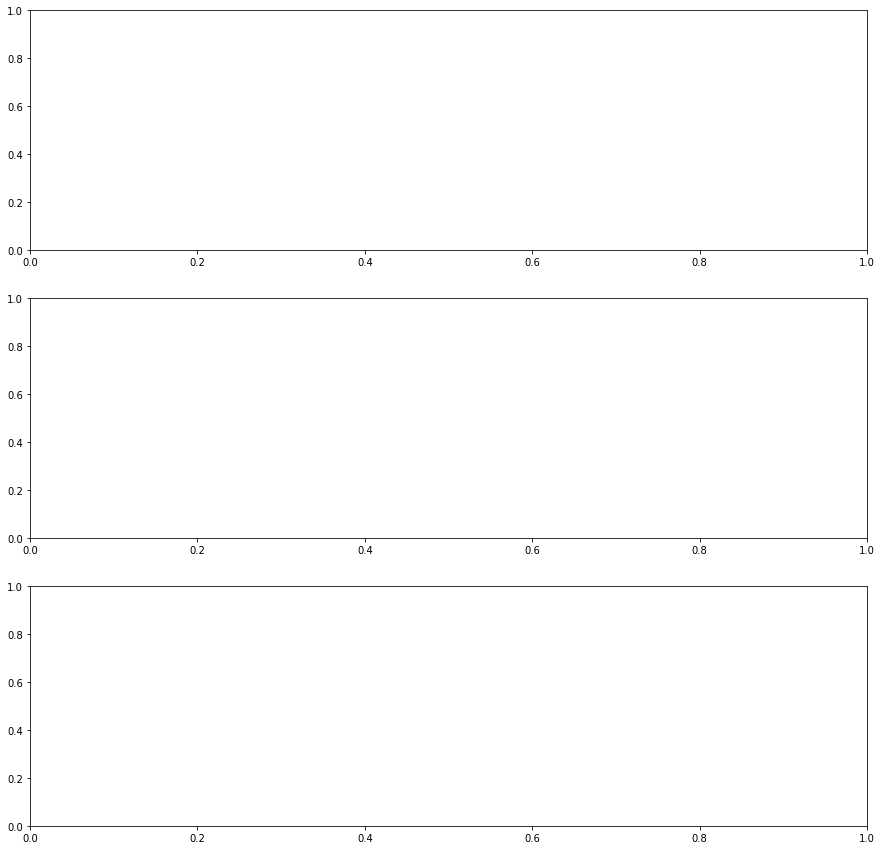

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (5 layer MLP)"
clf1 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,), solver='sgd', max_iter=10000, random_state=18)
clf1.fit(train_X, train_y)
plt.subplot(clf1.loss_curve_)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (10 layer MLP)"
clf2 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10,), solver='sgd', max_iter=10000, random_state=18)
clf2.fit(train_X, train_y)
plt.subplot(clf2.loss_curve_)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

title = "Learning Curves (15 layer MLP)"
clf3 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(15,), solver='sgd', max_iter=10000, random_state=18)
clf3.fit(train_X, train_y)
plt.subplot(clf3.loss_curve_)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [19]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(5,)),
    Dense(6, activation='relu'),
    Dense(1, activation='relu'),
])

In [20]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [21]:
train2_X, val_X, train2_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=100)

hist = model.fit(train2_X, train2_y,
          batch_size=5, epochs=10,
          validation_data=(val_X, val_y))


Epoch 1/10
535/535 [==============================] - 1s 1ms/step - loss: 91.6145 - accuracy: 0.0000e+00 - val_loss: 86.0179 - val_accuracy: 0.0015
Epoch 2/10
535/535 [==============================] - 0s 781us/step - loss: 91.6145 - accuracy: 0.0000e+00 - val_loss: 86.0179 - val_accuracy: 0.0015
Epoch 3/10
535/535 [==============================] - 0s 846us/step - loss: 91.6145 - accuracy: 0.0000e+00 - val_loss: 86.0179 - val_accuracy: 0.0015
Epoch 4/10
535/535 [==============================] - 0s 883us/step - loss: 91.6145 - accuracy: 0.0000e+00 - val_loss: 86.0179 - val_accuracy: 0.0015
Epoch 5/10
535/535 [==============================] - 0s 914us/step - loss: 91.6145 - accuracy: 0.0000e+00 - val_loss: 86.0179 - val_accuracy: 0.0015
Epoch 6/10
535/535 [==============================] - 0s 871us/step - loss: 91.6145 - accuracy: 0.0000e+00 - val_loss: 86.0179 - val_accuracy: 0.0015
Epoch 7/10
535/535 [==============================] - 0s 900us/step - loss: 91.6145 - accuracy: 0.0000

In [22]:
model.evaluate(test_X, test_y)[1]

27/27 [==============================] - 0s 572us/step - loss: 88.9742 - accuracy: 0.0000e+00


0.0

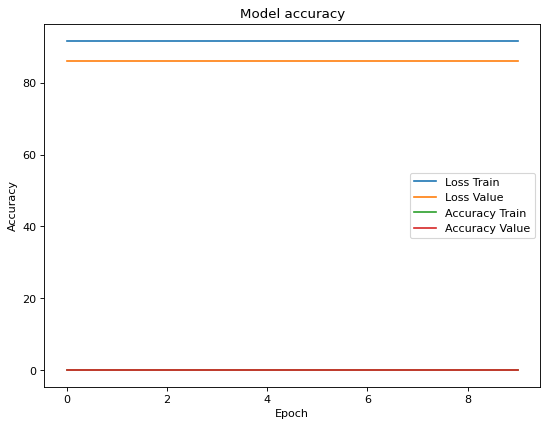

In [23]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Value', 'Accuracy Train', 'Accuracy Value'], loc='best')
plt.show()

### Boosting

In [ ]:
n_learning_rate_steps, n_folds = 10, 10
learninn_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)
 
for i, rate in enumerate(learning_rates):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump, 
                                   n_estimators=10, learning_rate=rate)
        model.fit(train_X.values[trn, :], train_y.values[trn])
        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], model.predict(train_X.values[val, :]))
trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)
print(f'Training Error {trn_err}, Value Error {val_err}')


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(learning_rates, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(learning_rates, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Learning rate')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [ ]:
n_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)

In [ ]:
n_estimator_steps, n_folds = 2, 10
number_of_stumps = np.arange(2, 40, n_estimator_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)

trn_err = np.zeros((len(number_of_stumps), n_folds))
val_err = np.zeros((len(number_of_stumps), n_folds))

stump = DecisionTreeClassifier(max_depth=1)
for i, n_stumps in enumerate(number_of_stumps):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump,
                                   n_estimators=n_stumps, learning_rate=0.9)
        model.fit(train_X.values[trn, :], train_y.values[trn])

        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], 
                                           model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], 
                                           model.predict(train_X.values[val, :]))

trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(number_of_stumps, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Number of decision stumps')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [ ]:
shallow_tree = DecisionTreeClassifier(max_depth=1)
ensemble = AdaBoostClassifier(base_estimator=shallow_tree, 
                                  n_estimators=32, learning_rate=0.6)
ensemble.fit(train_X, train_y)

In [ ]:
ypred = ensemble.predict(test_X)
acc = accuracy_score(test_y, ypred)
acc

### SVM

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (C5 layer MLP)"
clf1 = model = svm.SVC(kernel='poly', C=15, gamma='auto')
clf1.fit(train_X, train_y)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP)"
clf2 = model = svm.SVC(kernel='poly', C=30, gamma='auto')
clf2.fit(train_X, train_y)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP)"
clf3 = model = svm.SVC(kernel='poly', C=45, gamma='auto')
clf3.fit(train_X, train_y)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)


plt.show()

In [ ]:
print(f'Best Score - C5: {clf1.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C30: {clf2.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C45: {clf3.score(test_X, test_y)*100:.2f}%')

### KNN

In [ ]:
# try to find best k value
scoreList = []
for i in range(2,40,2):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_X, train_y)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, knn2.predict_proba(test_X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,knn2.predict(test_X))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (f'# Nodes: {i}', auc))
    scoreList.append(knn2.score(test_X, test_y))
    # Custom settings for the plot 

In [ ]:
plt.plot(range(2,40,2), scoreList)
plt.xticks(np.arange(2,40,2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


In [ ]:
acc = max(scoreList)*100
print(f'Maximum KNN Accuracy is {acc:.2f}%')